# 1. Install Dependencies and Setup

In [58]:
# !pip install tensorflow

In [59]:
# !pip install opencv-python 
# !pip install matplotlib

In [60]:
# !pip list 

In [61]:
import tensorflow as tf
import os

In [62]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [63]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [64]:
data_dir = 'data3' 

In [65]:
os.listdir(os.path.join(data_dir,'real'))

['21615.jpg',
 '21616.jpg',
 '21617.jpg',
 '21619.jpg',
 'image1.jpeg',
 'img1.JPG',
 'img10.JPG',
 'img100.JPG',
 'img101.JPG',
 'img102.JPG',
 'img103.JPG',
 'img104.JPG',
 'img105.JPG',
 'img106.JPG',
 'img107.JPG',
 'img108.JPG',
 'img109.JPG',
 'img11.JPG',
 'img110.JPG',
 'img114.JPG',
 'img116.JPG',
 'img117.JPG',
 'img118.JPG',
 'img119.JPG',
 'img12.JPG',
 'img120.JPG',
 'img121.JPG',
 'img122.JPG',
 'img123.JPG',
 'img124.JPG',
 'img125.JPG',
 'img126.JPG',
 'img127.JPG',
 'img128.JPG',
 'img129.JPG',
 'img13.JPG',
 'img130.JPG',
 'img131.JPG',
 'img132.JPG',
 'img133.JPG',
 'img134.JPG',
 'img135.JPG',
 'img136.JPG',
 'img137.JPG',
 'img138.JPG',
 'img14.JPG',
 'img140.JPG',
 'img141.JPG',
 'img142.JPG',
 'img143.JPG',
 'img144.JPG',
 'img145.JPG',
 'img146.JPG',
 'img147.JPG',
 'img148.JPG',
 'img149.JPG',
 'img15.JPG',
 'img150.JPG',
 'img151.JPG',
 'img152.JPG',
 'img153.JPG',
 'img154.JPG',
 'img155.JPG',
 'img156.JPG',
 'img157.JPG',
 'img158.JPG',
 'img159.JPG',
 'img1

In [66]:
for image_class in os.listdir(data_dir):
    print(image_class) 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        pass
#         print(image)
    

fake
real


In [67]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [68]:
img = cv2.imread(os.path.join('data','real', 'real_00001.jpg'))

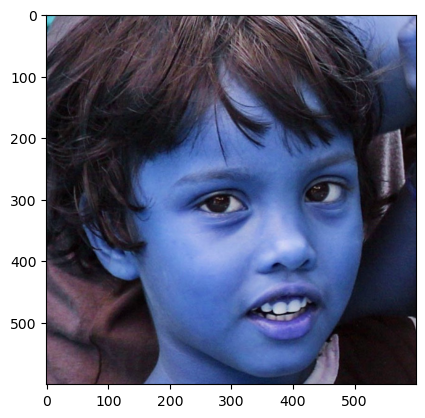

In [69]:
# type(img)     # Img datatype
# img.shape     # Image dimension
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [70]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [71]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
tf.keras.utils.image_dataset_from_directory??


In [73]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1155 files belonging to 3 classes.


In [74]:
data_iterator = data.as_numpy_iterator()

In [75]:
# data_iterator

In [76]:
# Run again to get another batch from the iterator
batch = data_iterator.next()

In [77]:
# Image representation as numpy arrays
# batch[0].shape
# 1 = realimages
# 0 =  fake images
batch[1]

array([0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2,
       0, 2, 0, 1, 0, 1, 2, 2, 1, 1])

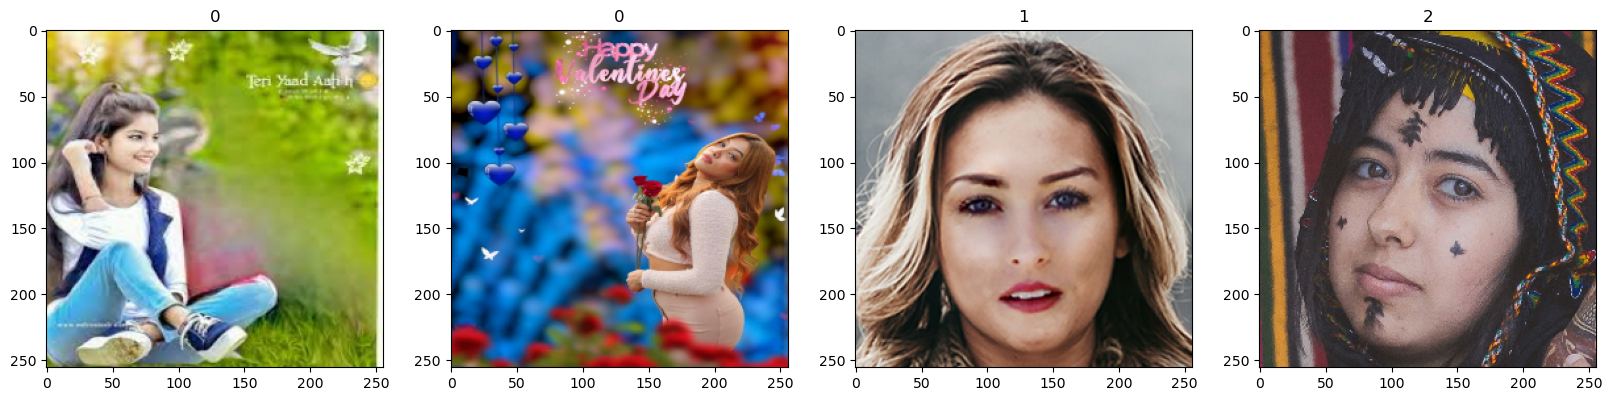

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Step2: Data Pre-processing

# 4. Scale Data

In [79]:
# batch[0].shape
# batch[0].min()
batch[0].max()


255.0

In [80]:

data = data.map(lambda x,y: (x/255, y))

In [81]:
# scaled_iterator = data.as_numpy_iterator()
data.as_numpy_iterator().next()

(array([[[[1.24295346e-01, 2.30177701e-01, 4.07199740e-01],
          [1.24812350e-01, 2.41142005e-01, 3.92490029e-01],
          [1.37928918e-01, 2.70373762e-01, 3.84620100e-01],
          ...,
          [1.41130522e-01, 2.00815722e-01, 2.14816943e-01],
          [2.41333485e-01, 3.01321238e-01, 3.14035684e-01],
          [2.49563426e-01, 3.11500460e-01, 3.22928160e-01]],
 
         [[1.15743719e-01, 2.24019602e-01, 3.85194540e-01],
          [1.18106619e-01, 2.36079201e-01, 3.73376220e-01],
          [1.39491424e-01, 2.72824764e-01, 3.78726244e-01],
          ...,
          [9.81751680e-01, 9.97548997e-01, 9.96725619e-01],
          [9.77941155e-01, 1.00000000e+00, 9.97365177e-01],
          [9.82900560e-01, 1.00000000e+00, 9.99563396e-01]],
 
         [[1.30882353e-01, 2.42589608e-01, 3.82414222e-01],
          [1.33812040e-01, 2.55216002e-01, 3.72070312e-01],
          [1.40870094e-01, 2.77236521e-01, 3.60868573e-01],
          ...,
          [9.96078432e-01, 1.00000000e+00, 9.8039

In [82]:
# batch = scaled_iterator.next()

In [83]:
# batch[1]

In [84]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [85]:
len(data)

37

In [86]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [87]:
train_size+test_size+val_size

35

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Step3: Deep Model

# 6. Build Deep Learning Model

In [89]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [91]:
model = Sequential()

In [92]:
MaxPooling2D??

In [93]:
# 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #softmax classification for more then 2 classification

In [94]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [96]:
logdir='logs'

In [97]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
hist.history

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'{pre.result().numpy()}, {re.result().numpy()}, {acc.result().numpy()}')

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('easy.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# resize
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
print(yhat)
if yhat > 0.5:
    print(f'Predicted is real')
else:
    print(f'Predicted is fake')

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import shutil
import os
import matplotlib.pyplot as plt  # Import matplotlib
from tkinter import *
# from tkinter import ttk
from tkinter import filedialog


# Define your model here if not already done.
# Define the labels for your pie chart
labels = ['Real', 'Fake']

# Create an instance of Tkinter frame
win = Tk()

# Set the geometry of Tkinter frame
win.geometry("750x400")  # Increased height to accommodate the pie chart
absolute_path =""
def open_image():
    global absolute_path  # Declare absolute_path as a global variable
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png *.jpg *.jpeg *.gif *.bmp")])
    if file_path:
        # Define the destination folder where the image will be saved
        destination_folder = "image_folder"
        os.makedirs(destination_folder, exist_ok=True)
        
        # Extract the file name from the full path
        file_name = file_path.split("/")[-1]

        # Build the destination path
        destination_path = os.path.join(destination_folder, file_name)

        # Copy the image to the destination folder
        shutil.copy(file_path, destination_path)

        # Get the absolute path of the saved image
        absolute_path = os.path.abspath(destination_path)

        label1.config(text=f"Image Saved at: {absolute_path}")

        


def display_text():

        img = cv2.imread(absolute_path)

        if img is not None:
            resize = cv2.resize(img, (256, 256))  # Use cv2.resize for image resizing
            yhat = model.predict(np.expand_dims(resize / 255, 0))

            if yhat > 0.5:
                label.configure(text='Predicted class is Real')
            else:
                label.configure(text='Predicted class is Fake')

            # Create and display the pie chart
            pie_chart(yhat)

        else:
            label.configure(text='Failed to read the image. Check the file path.')



def pie_chart(yhat):
    # Ensure yhat is a 1D array
    yhat = yhat.ravel()

    # Create a pie chart based on yhat
    plt.figure(figsize=(4, 4))
    plt.pie([yhat[0], 1 - yhat[0]], labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Prediction Probability')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Save the pie chart to an image file (temporary)
    plt.savefig('pie_chart.png')

    # Display the pie chart in Tkinter using a PhotoImage
    pie_image = PhotoImage(file='pie_chart.png')

    # Clear the canvas and re-draw the pie chart at the desired location
    pie_canvas.delete("all")
    pie_canvas.create_image(170, 175, image=pie_image )  # Adjust the (x, y) coordinates as needed
    pie_canvas.image = pie_image

# Label
label = Label(win, text="", font=("Courier 22 bold"))
label.pack()

label1 = Label(win, text="", padx=10, pady=10)
label1.pack()


# Create an Entry widget to accept User Input
open_button = Button(win, text="Click To Open Image", command=open_image)
open_button.pack()

# Create a Button to validate Entry Widget
Button(win, text="Okay", width=20, command=display_text).pack(pady=20)

# Create a canvas to display the pie chart
pie_canvas = Canvas(win, width=350, height=350,  highlightthickness=0)
pie_canvas.pack()

# Create a label to display the pie chart
pie_label = Label(win)
pie_label.pack()

win.mainloop()
